In [1]:
from reinforce import *
import numpy as onp

%matplotlib inline
import matplotlib.pyplot as plt

## $swf$ for 5 simulations, utilitarian

/Users/victorgallego/miniconda3/lib/python3.8/site-packages/jax-0.1.68-py3.8.egg/jax/lib/xla_bridge.py:116: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


[[ 1.8687401 -2.2024465]] [[ 1.9497826 -1.9899608]]
logits: [[-2.5987287  2.265022 ]] [[-2.3147578  2.274579 ]] [[0.5822667 1.0514504 1.5509439 0.8153389]]
mean SU: 5.7869997
mean tax 0.16
logits: [[-2.5876265  2.2539206]] [[-2.2882042  2.248026 ]] [-3.0640213]
mean SU: 5.794
mean tax 0.30110693
[[ 1.378351  -2.4278069]] [[ 2.1431346 -1.5636588]]
logits: [[ 0.23565379 -1.2851094 ]] [[ 1.280025  -0.7005506]] [[1.0519904 1.750477  0.5702897 0.6272423]]
mean SU: 2.124
mean tax 0.13500002
logits: [[-2.4702144  1.4207587]] [[-1.9597455  2.5392206]] [3.4696462]
mean SU: 4.3640003
mean tax 0.3922272
[[-2.6111152  2.118912 ]] [[-2.4655337  1.6851563]]
logits: [[-1.9986535  1.5064512]] [[-2.7069688  1.9265921]] [[0.92692137 1.1107104  0.8612788  1.1010892 ]]
mean SU: 5.582
mean tax 0.14940001
logits: [[-2.517079   2.0248747]] [[-2.773196   1.9928185]] [8.317019]
mean SU: 5.573
mean tax 0.45443013
[[ 1.6633452 -2.3018074]] [[ 1.0618289 -3.0041401]]
logits: [[ 1.516616  -2.1550777]] [[ 0.87408453

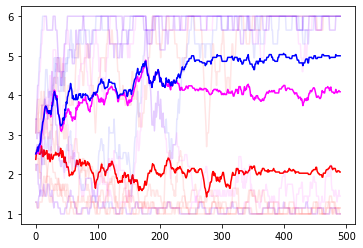

In [2]:
N_exps = 5

SUs = []

swf = utilitarian_swf

for i in range(N_exps):
    SUs.append([run_data_coop_game(i, swf), 
                run_data_coop_game_with_regulator(i, swf), 
                run_data_coop_game_with_gaussian_regulator(i, swf)])
    
SUs = np.array(SUs)

colors = onp.asarray(['red', 'magenta', 'blue'])

smooth = 10
for i in range(3):
    for j in range(N_exps):
        plt.plot(np.convolve(SUs[j, i, :, 0], np.ones(smooth)/smooth, mode='valid'), color=colors[i], alpha=0.1)
    plt.plot(np.convolve(SUs.mean(axis=0)[i, :, 0], np.ones(smooth)/smooth, mode='valid'), color=colors[i])

## $swf$ for 5 simulations, rawlsian

In [3]:
N_exps = 5

SUs = []

swf = rawlsian_swf

for i in range(N_exps):
    SUs.append([run_data_coop_game(i, swf), 
                run_data_coop_game_with_regulator(i, swf), 
                run_data_coop_game_with_gaussian_regulator(i, swf)])

[[ 1.8687401 -2.2024465]] [[ 1.9497826 -1.9899608]]
logits: [[-2.5987287  2.265022 ]] [[-2.3147578  2.274579 ]] [[0.5822667 1.0514504 1.5509439 0.8153389]]
mean SU: 5.7869997
mean tax 0.16
logits: [[-2.5876265  2.2539206]] [[-2.2882042  2.248026 ]] [-3.0640213]
mean SU: 5.794
mean tax 0.30110693
[[ 1.378351  -2.4278069]] [[ 2.1431346 -1.5636588]]
logits: [[ 0.23565379 -1.2851094 ]] [[ 1.280025  -0.7005506]] [[1.0519904 1.750477  0.5702897 0.6272423]]
mean SU: 2.124
mean tax 0.13500002
logits: [[-2.4702144  1.4207587]] [[-1.9597455  2.5392206]] [3.4696462]
mean SU: 4.3640003
mean tax 0.3922272
[[-2.6111152  2.118912 ]] [[-2.4655337  1.6851563]]
logits: [[-1.9986535  1.5064512]] [[-2.7069688  1.9265921]] [[0.92692137 1.1107104  0.8612788  1.1010892 ]]
mean SU: 5.582
mean tax 0.14940001
logits: [[-2.517079   2.0248747]] [[-2.773196   1.9928185]] [8.317019]
mean SU: 5.573
mean tax 0.45443013
[[ 1.6633452 -2.3018074]] [[ 1.0618289 -3.0041401]]
logits: [[ 1.516616  -2.1550777]] [[ 0.87408453

In [4]:
for i in range(N_exps):
    SUs[i][2] = SUs[i][2].squeeze(-1)
SUs = np.array(SUs)

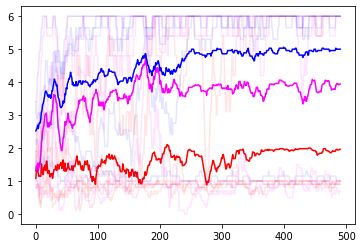

In [5]:
colors = onp.asarray(['red', 'magenta', 'blue'])

smooth = 10
for i in range(3):
    for j in range(N_exps):
        plt.plot(np.convolve(SUs[j, i, :], np.ones(smooth)/smooth, mode='valid'), color=colors[i], alpha=0.1)
    plt.plot(np.convolve(SUs.mean(axis=0)[i, :], np.ones(smooth)/smooth, mode='valid'), color=colors[i])

## Further work

* Parameterize the swf and metalearn the parameters for faster convergence.

* Add state to the players